In [58]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [59]:

df = pd.read_csv(r"C:\Product_Return_Predictions_Final\NOTEBOOK\data\Returns_prediction_for_E-commers_1.csv")

In [60]:
df.head()

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,...,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Delivery_Days,Past_Orders,Past_Returns,Past_Return_Rate,Region
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,NaN,Beauty,367.51,1,NaN,Not Returned,...,Male,City22,Credit Card,Next-Day,0.00,1,3,0,0.000,South
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,1.697242e+18,Clothing,262.75,1,Changed Mind,Returned,...,Female,City16,Credit Card,Express,21.57,4,8,1,0.125,South
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,Home,375.88,5,NaN,Not Returned,...,Female,City48,Cash on Delivery,Next-Day,0.00,1,2,0,0.000,East
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,1.725754e+18,Toys,352.96,1,Late Delivery,Returned,...,Male,City30,Wallet,Next-Day,51.76,2,2,1,0.500,Central
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,Sports,100.68,7,NaN,Not Returned,...,Female,City23,PayPal,Standard,23.47,6,4,0,0.000,West



# Pre-Processing

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       3350 non-null   float64
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     3235 non-null   object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    3350 non-null   float64
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [7]:
df.shape

(10000, 22)

In [8]:
df.describe()

,Return_Date,Product_Price,Order_Quantity,Days_to_Return,User_Age,Discount_Applied,Delivery_Days,Past_Orders,Past_Returns,Past_Return_Rate
count,3.350000e+03,10000.000000,10000.000000,3350.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.705192e+18,250.213713,2.747400,14.625672,38.594000,14.658682,3.987000,3.986600,0.71670,0.174521
std,1.803242e+16,138.275485,2.044801,7.121322,14.428353,17.766002,2.081121,1.989024,0.85224,0.217343
min,1.672963e+18,4.330000,1.000000,5.000000,18.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,1.689574e+18,133.387500,1.000000,10.000000,26.000000,0.000000,3.000000,3.000000,0.00000,0.000000
50%,1.705277e+18,243.040000,2.000000,15.000000,34.000000,9.700000,4.000000,4.000000,1.00000,0.111000
75%,1.720807e+18,364.700000,4.000000,20.000000,53.000000,21.500000,5.000000,5.000000,1.00000,0.333000
max,1.738109e+18,567.200000,10.000000,34.000000,67.000000,70.000000,10.000000,14.000000,6.00000,1.000000


In [9]:
df.describe(include='object')

,Order_ID,Product_ID,User_ID,Order_Date,Product_Category,Return_Reason,Return_Status,User_Gender,User_Location,Payment_Method,Shipping_Method,Region
count,10000,10000,10000,10000,10000,3235,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,731,10,7,2,2,50,5,3,5
top,ORD00000000,PROD00000000,USER00000000,2024-03-14,Clothing,Size Issue,Not Returned,Female,City15,Credit Card,Next-Day,West
freq,1,1,1,26,2154,678,6650,5052,272,4478,3394,2562


In [10]:
df.isnull().sum()

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         6650
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       6765
Return_Status          0
Days_to_Return      6650
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
Delivery_Days          0
Past_Orders            0
Past_Returns           0
Past_Return_Rate       0
Region                 0
dtype: int64

In [11]:
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Unique Values per Column:
Order_ID: 10000
Product_ID: 10000
User_ID: 10000
Order_Date: 731
Return_Date: 737
Product_Category: 10
Product_Price: 9076
Order_Quantity: 10
Return_Reason: 7
Return_Status: 2
Days_to_Return: 25
User_Age: 28
User_Gender: 2
User_Location: 50
Payment_Method: 5
Shipping_Method: 3
Discount_Applied: 3186
Delivery_Days: 10
Past_Orders: 15
Past_Returns: 7
Past_Return_Rate: 33
Region: 5


# EDA

In [ ]:
# Convert dates safely
if 'Order_Date' in df.columns:
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
if 'Return_Date' in df.columns:
    df['Return_Date'] = pd.to_datetime(df['Return_Date'], errors='coerce')

# Create Days_Between_Order_Return
if 'Order_Date' in df.columns and 'Return_Date' in df.columns:
    df['Days_Between_Order_Return'] = (df['Return_Date'] - df['Order_Date']).dt.days
    df['Days_Between_Order_Return'] = df['Days_Between_Order_Return'].abs()
    df['Days_Between_Order_Return'].fillna(df['Days_Between_Order_Return'].median(), inplace=True)
    df.drop(['Order_Date', 'Return_Date'], axis=1, inplace=True, errors='ignore')
    print("Added 'Days_Between_Order_Return' feature successfully.")
else:
    print("Skipping date-based feature creation (columns not found).")

Skipping date-based feature creation (columns not found).


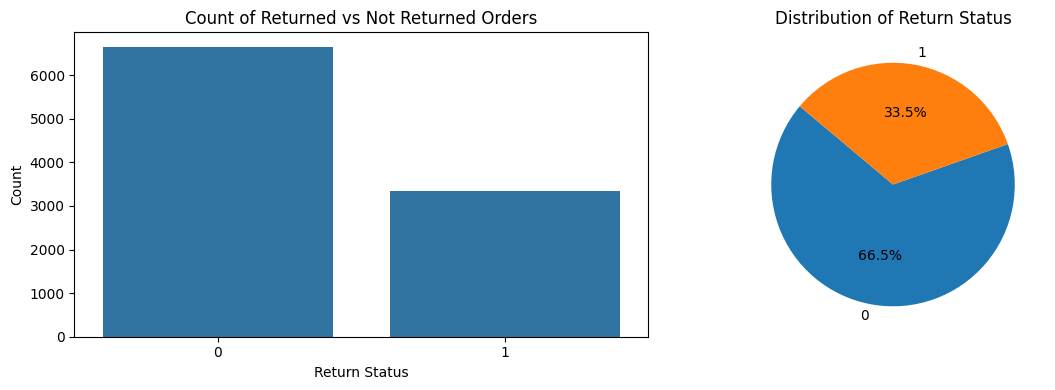

In [47]:
df["Return_Status_num"] = df["Return_Status"].map({"Not Returned": 0, "Returned": 1})

if __name__ == "__main__":
    # Return Status Distribution
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x='Return_Status', data=df)
    plt.title('Count of Returned vs Not Returned Orders')
    plt.xlabel('Return Status')
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    status_counts = df['Return_Status'].value_counts()
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Return Status')
    
    plt.tight_layout()
    plt.show()

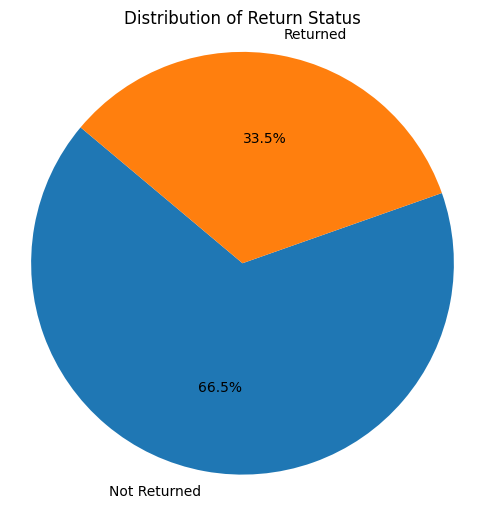

In [15]:
plt.figure(figsize=(6,6))
status_counts = df['Return_Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Return Status')
plt.axis('equal')
plt.show()


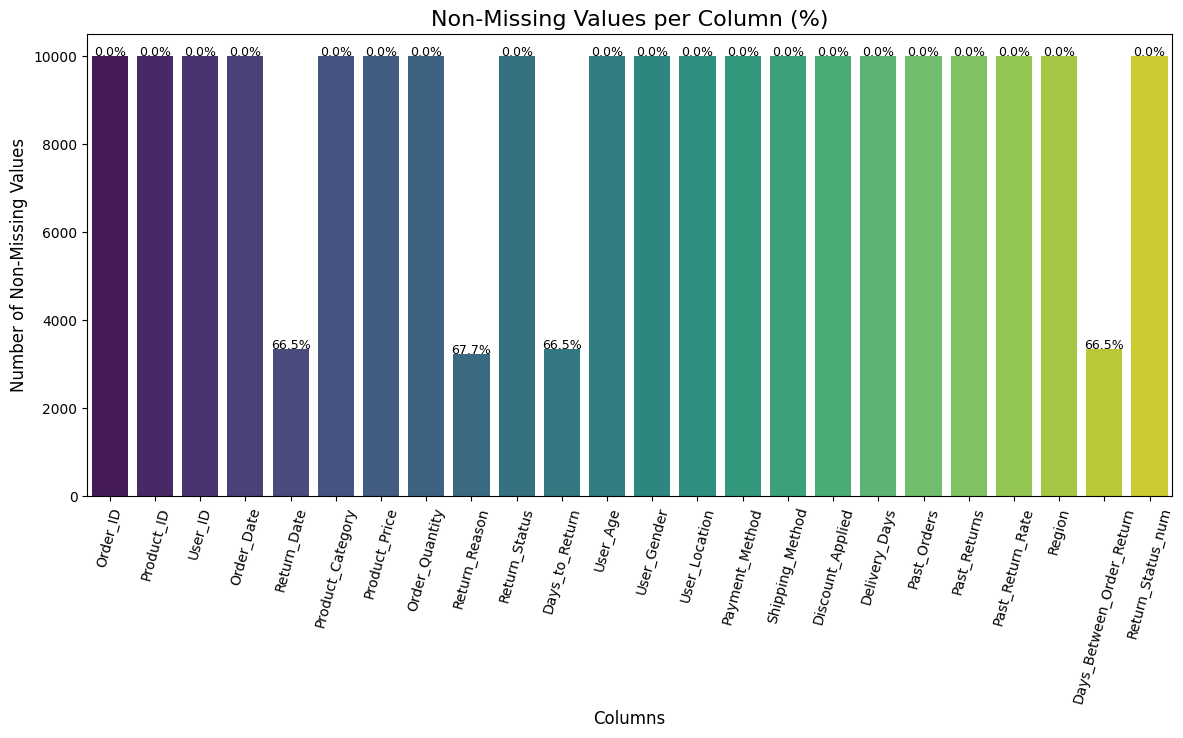

In [16]:
non_missing = df.notnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

plt.figure(figsize=(14,6))
sns.barplot(x=non_missing.index, y=non_missing.values, palette="viridis")

for i, v in enumerate(non_missing.values):
    plt.text(i, v + 2, f"{missing_percent[i]:.1f}%", ha='center', fontsize=9)

plt.title("Non-Missing Values per Column (%)", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Non-Missing Values", fontsize=12)
plt.xticks(rotation=75)
plt.show()


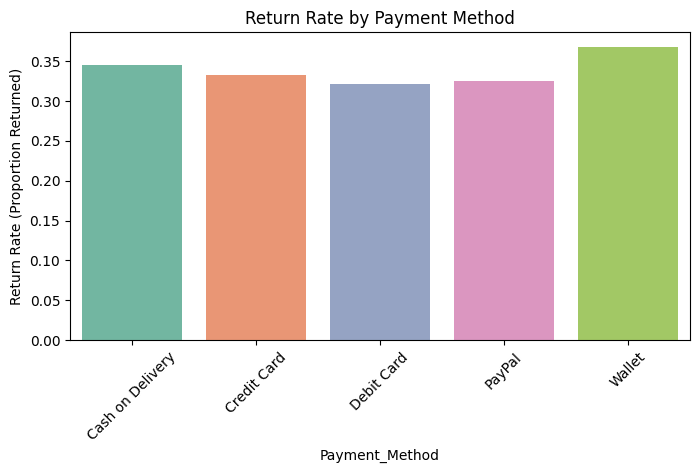

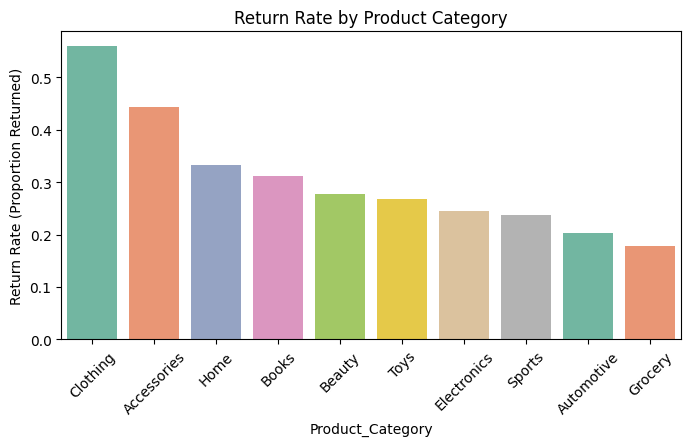

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure Return_Status is binary 0/1
df["Return_Status_num"] = df["Return_Status"].map({"Not Returned":0,"Returned":1})

# --- Return rate per Payment Method ---
if "Payment_Method" in df.columns:
    return_rate = df.groupby("Payment_Method")["Return_Status_num"].mean().reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(x="Payment_Method", y="Return_Status_num", data=return_rate, palette="Set2")
    plt.ylabel("Return Rate (Proportion Returned)")
    plt.title("Return Rate by Payment Method")
    plt.xticks(rotation=45)
    plt.show()

# --- Return rate per Product Category ---
if "Product_Category" in df.columns:
    return_rate = df.groupby("Product_Category")["Return_Status_num"].mean().sort_values(ascending=False).reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(x="Product_Category", y="Return_Status_num", data=return_rate, palette="Set2")
    plt.ylabel("Return Rate (Proportion Returned)")
    plt.title("Return Rate by Product Category")
    plt.xticks(rotation=45)
    plt.show()


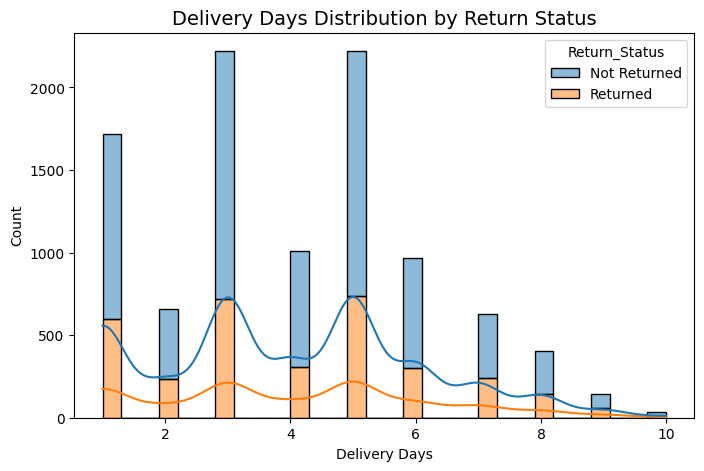

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Delivery_Days", hue="Return_Status", bins=30, kde=True, multiple="stack")
plt.title("Delivery Days Distribution by Return Status", fontsize=14)
plt.xlabel("Delivery Days")
plt.ylabel("Count")
plt.show()


In [19]:

temp_df = df.copy()
temp_df["Delivery_Days_Bin"] = pd.cut(temp_df["Delivery_Days"], bins=[0,2,6,10,20])
return_rates = temp_df.groupby("Delivery_Days_Bin")["Return_Status_num"].mean()
print(return_rates)


Delivery_Days_Bin
(0, 2]      0.349306
(2, 6]      0.321846
(6, 10]     0.376656
(10, 20]         NaN
Name: Return_Status_num, dtype: float64


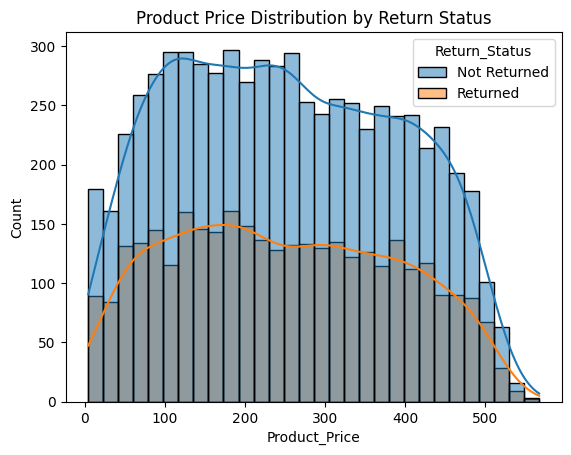

In [20]:
sns.histplot(data=df, x="Product_Price", hue="Return_Status", bins=30, kde=True)
plt.title("Product Price Distribution by Return Status")
plt.show()


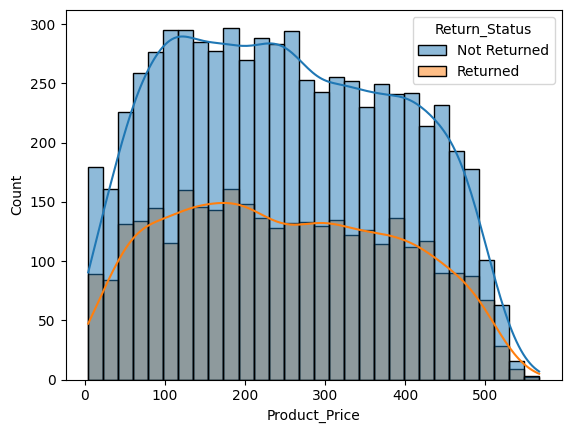

Product_Price_Bin
(4.329, 66.964]       0.351
(66.964, 113.132]     0.320
(113.132, 155.157]    0.339
(155.157, 198.786]    0.348
(198.786, 243.04]     0.330
(243.04, 289.462]     0.322
(289.462, 338.973]    0.348
(338.973, 390.844]    0.346
(390.844, 445.382]    0.321
(445.382, 567.2]      0.325
Name: Return_Status_num, dtype: float64


In [21]:
if __name__ == "__main__":
    # Run this part only during local analysis, not in deployment
    sns.histplot(data=df, x="Product_Price", hue="Return_Status", bins=30, kde=True)
    plt.show()

    df["Product_Price_Bin"] = pd.qcut(df["Product_Price"], q=10)
    return_rates = df.groupby("Product_Price_Bin")["Return_Status_num"].mean()
    print(return_rates)


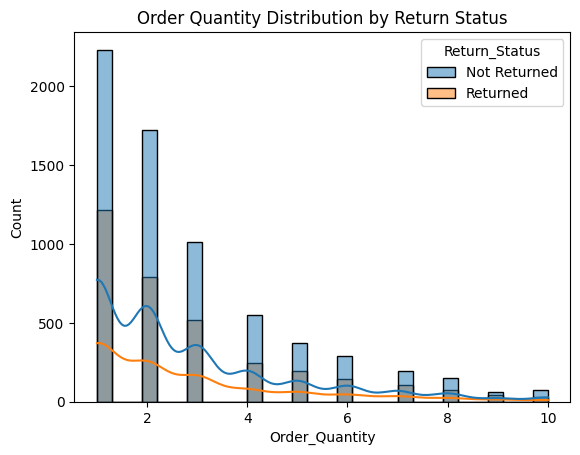

In [22]:
if __name__ == "__main__":
    sns.histplot(data=df, x="Order_Quantity", hue="Return_Status", bins=30, kde=True)
    plt.title("Order Quantity Distribution by Return Status")
    plt.show()


In [23]:
if __name__ == "__main__":
    df["Order_Qty_Bin"] = pd.qcut(df["Order_Quantity"], q=10, duplicates="drop")
    order_qty_return_rates = df.groupby("Order_Qty_Bin")["Return_Status_num"].mean()
    print(order_qty_return_rates)


Order_Qty_Bin
(0.999, 2.0]    0.336803
(2.0, 3.0]      0.338139
(3.0, 4.0]      0.306045
(4.0, 6.0]      0.335685
(6.0, 10.0]     0.344262
Name: Return_Status_num, dtype: float64


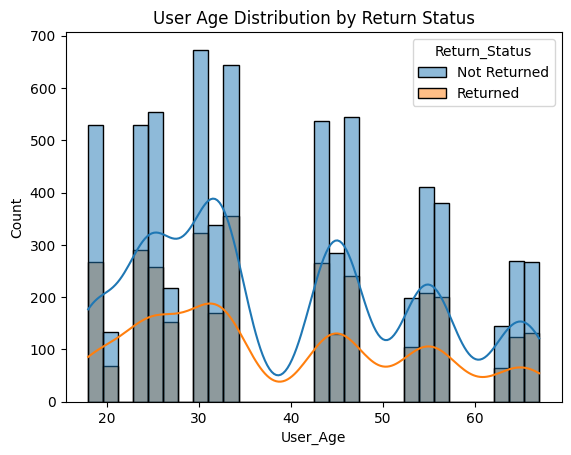

In [24]:
if __name__ == "__main__":
    sns.histplot(data=df, x="User_Age", hue="Return_Status", bins=30, kde=True)
    plt.title("User Age Distribution by Return Status")
    plt.show()


In [25]:
if __name__ == "__main__":
    df["User_Age_Bin"] = pd.qcut(df["User_Age"], q=10, duplicates="drop")
    User_Age_return_rates = df.groupby("User_Age_Bin")["Return_Status_num"].mean()
    print(User_Age_return_rates)


User_Age_Bin
(17.999, 23.0]    0.344147
(23.0, 25.0]      0.322929
(25.0, 30.0]      0.355096
(30.0, 32.0]      0.326284
(32.0, 34.0]      0.355355
(34.0, 44.0]      0.331258
(44.0, 46.0]      0.310429
(46.0, 54.0]      0.313253
(54.0, 63.0]      0.348263
(63.0, 67.0]      0.322825
Name: Return_Status_num, dtype: float64


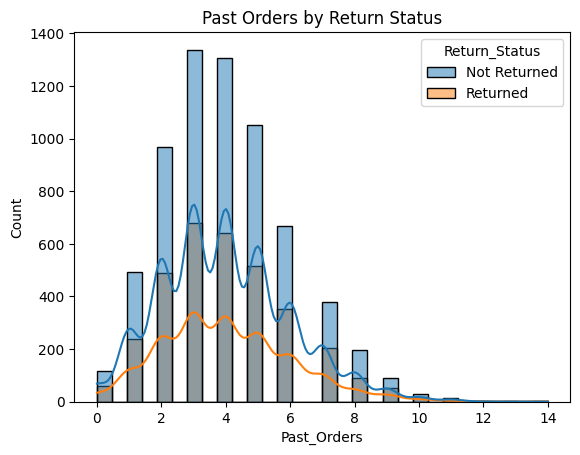

In [26]:
if __name__ == "__main__":
    sns.histplot(data=df, x="Past_Orders", hue="Return_Status", bins=30, kde=True)
    plt.title("Past Orders by Return Status")
    plt.show()


In [27]:
if __name__ == "__main__":
    df["Past_Orders_Bin"] = pd.qcut(df["Past_Orders"], q=10, duplicates="drop")
    Past_Orders_return_rates = df.groupby("Past_Orders_Bin")["Return_Status_num"].mean()
    print(Past_Orders_return_rates)


Past_Orders_Bin
(-0.001, 2.0]    0.333474
(2.0, 3.0]       0.335980
(3.0, 4.0]       0.329394
(4.0, 5.0]       0.329082
(5.0, 6.0]       0.344794
(6.0, 7.0]       0.349914
(7.0, 14.0]      0.341270
Name: Return_Status_num, dtype: float64


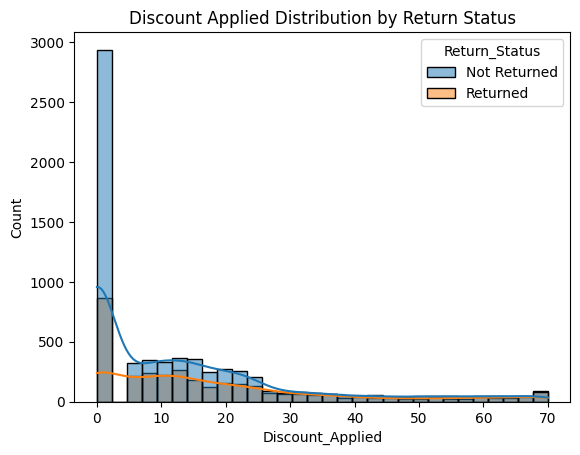

In [28]:
if __name__ == "__main__":
    sns.histplot(data=df, x="Discount_Applied", hue="Return_Status", bins=30, kde=True)
    plt.title("Discount Applied Distribution by Return Status")
    plt.show()


In [29]:
if __name__ == "__main__":
    df["Discount_Applied_Bin"] = pd.qcut(df["Discount_Applied"], q=10, duplicates="drop")
    Discount_Applied_return_rates = df.groupby("Discount_Applied_Bin")["Return_Status_num"].mean()
    print(Discount_Applied_return_rates)


Discount_Applied_Bin
(-0.001, 5.796]     0.235750
(5.796, 9.7]        0.402597
(9.7, 13.6]         0.408000
(13.6, 18.69]       0.346307
(18.69, 24.392]     0.370110
(24.392, 41.363]    0.446000
(41.363, 70.0]      0.434000
Name: Return_Status_num, dtype: float64


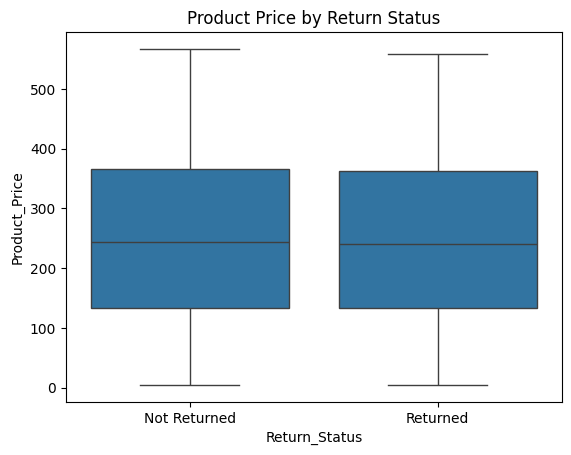

In [30]:
if __name__ == "__main__":
    sns.boxplot(x="Return_Status", y="Product_Price", data=df)
    plt.title("Product Price by Return Status")
    plt.show()


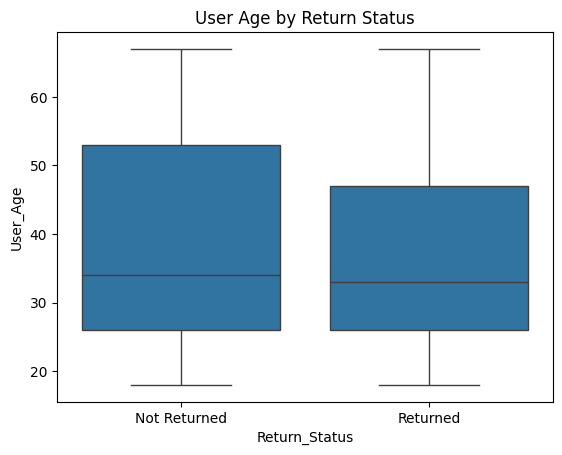

In [31]:
if __name__ == "__main__":
    sns.boxplot(x="Return_Status", y="User_Age", data=df)
    plt.title("User Age by Return Status")
    plt.show()


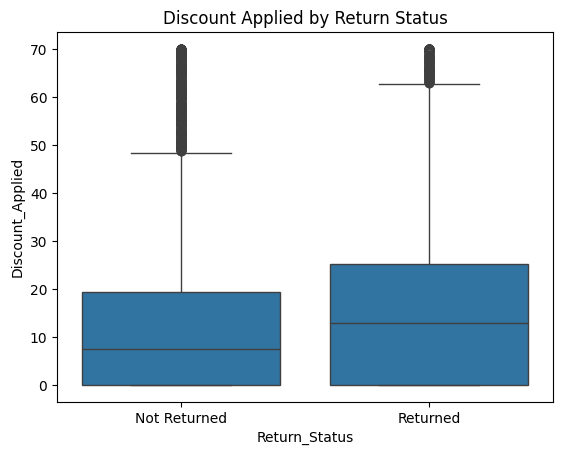

In [32]:
if __name__ == "__main__":
    sns.boxplot(x="Return_Status", y="Discount_Applied", data=df)
    plt.title("Discount Applied by Return Status")
    plt.show()


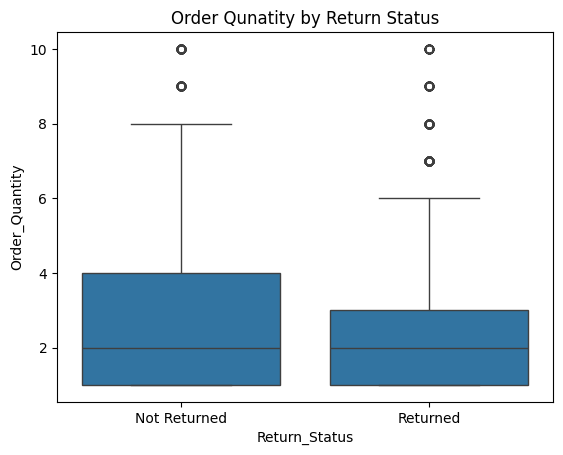

In [33]:
if __name__ == "__main__":
    
    sns.boxplot(x="Return_Status", y="Order_Quantity", data=df)
    plt.title("Order Qunatity by Return Status")
    plt.show()

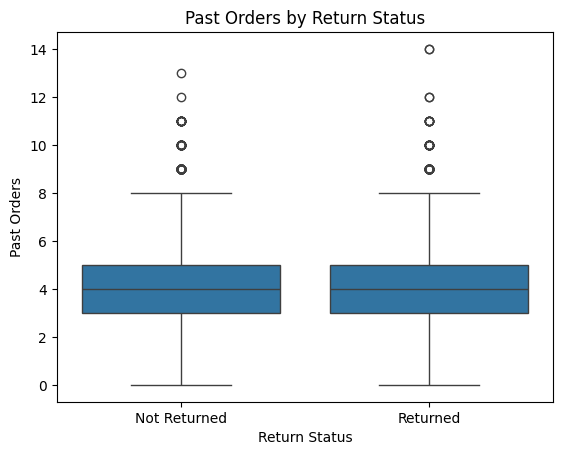

In [34]:
if __name__ == "__main__":
    
    sns.boxplot(x="Return_Status", y="Past_Orders", data=df)
    plt.title("Past Orders by Return Status")
    plt.xlabel("Return Status")
    plt.ylabel("Past Orders")
    plt.show()


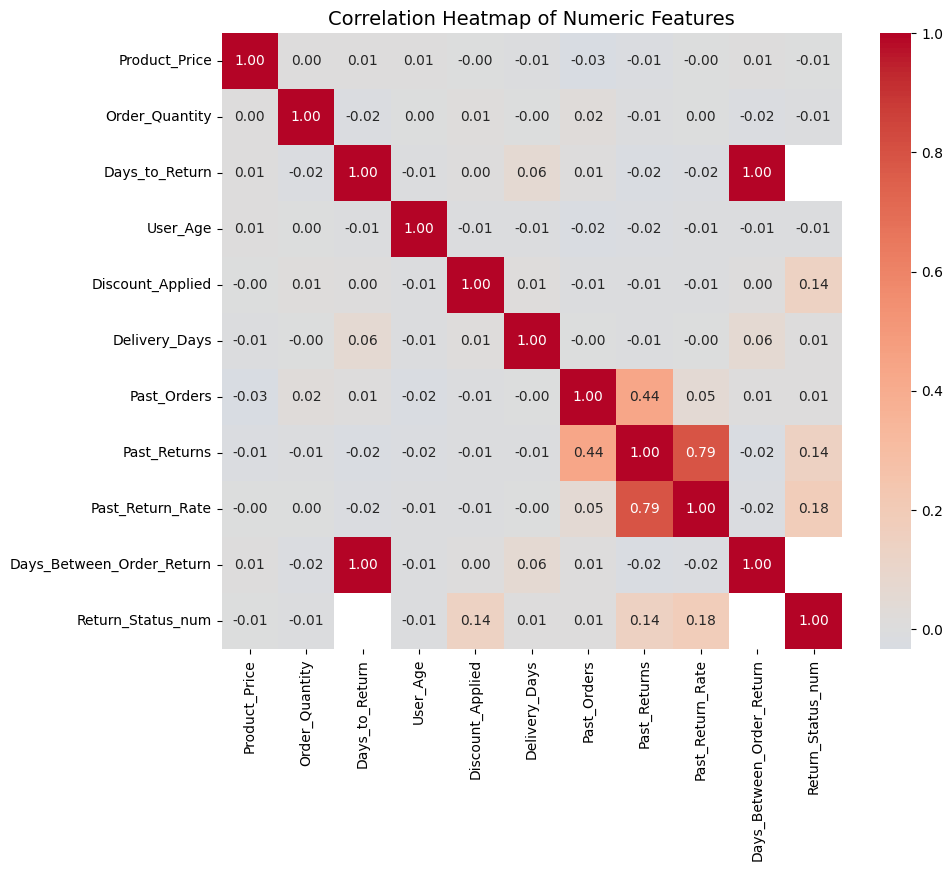

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == "__main__":
    # Select only numeric columns
    num_cols = df.select_dtypes(include=[np.number]).columns

    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0, annot=True, fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
    plt.show()


In [36]:
# Remove EDA-only columns before model training
eda_bins = [
    "Delivery_Days_Bin", 
    "Product_Price_Bin", 
    "Order_Qty_Bin", 
    "User_Age_Bin", 
    "Past_Orders_Bin", 
    "Discount_Applied_Bin"
]

df_model = df.drop(columns=eda_bins, errors='ignore')


In [37]:
# Remove datetime columns or convert to useful features
datetime_cols = df_model.select_dtypes(include=["datetime", "datetime64[ns]"]).columns

df_model = df_model.drop(columns=datetime_cols, errors='ignore')


In [38]:
# Rebuild the Return_Status column safely from the original dataframe (df)
if 'Return_Status' in df.columns:
    df_model['Return_Status'] = df['Return_Status']
elif 'Return_Status_num' in df.columns:
    df_model['Return_Status'] = df['Return_Status_num']
else:
    raise ValueError("⚠️ No return status column found in your dataset. Please check the raw CSV headers.")

# Check for missing values
print("Before cleaning:")
print(df_model['Return_Status'].value_counts(dropna=False))

# Map if it’s still text-based
if df_model['Return_Status'].dtype == 'object':
    df_model['Return_Status'] = df_model['Return_Status'].map({
        'Returned': 1, 
        'Not Returned': 0, 
        'returned': 1, 
        'not returned': 0
    })

# Drop rows where target is missing
df_model = df_model.dropna(subset=['Return_Status'])

print("\nAfter cleaning:")
print(df_model['Return_Status'].value_counts())


Before cleaning:
Return_Status
Not Returned    6650
Returned        3350
Name: count, dtype: int64

After cleaning:
Return_Status
0    6650
1    3350
Name: count, dtype: int64



# Feature Engineering And Model BUilding 

In [39]:
X = df_model.drop('Return_Status', axis=1)
y = df_model['Return_Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Split successful!")
print("Train:", X_train.shape)
print("Test:", X_test.shape)


Split successful!
Train: (8000, 21)
Test: (2000, 21)


In [40]:
print(df_model['Return_Status'].value_counts(dropna=False))


Return_Status
0    6650
1    3350
Name: count, dtype: int64


In [41]:
# Feature-target split
X = df_model.drop('Return_Status', axis=1)
y = df_model['Return_Status']

#  Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (8000, 21)
Test: (2000, 21)


In [1]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# ------------------------------------------------------------
# 1️⃣ Load Dataset
# ------------------------------------------------------------
df = pd.read_csv(r"C:\Product_Return_Predictions_Final\NOTEBOOK\data\Returns_prediction_for_E-commers_1.csv")

# ✅ Define the final features you want to keep
final_features = [
    "Product_Category",
    "Product_Price",
    "Order_Quantity",
    "User_Age",
    "User_Gender",
    "User_Location",
    "Payment_Method",
    "Shipping_Method",
    "Discount_Applied",
    "Delivery_Days",
    "Past_Orders",
    "Past_Returns",
    "Past_Return_Rate",
    "Region"
]

# ------------------------------------------------------------
# 2️⃣ Keep only relevant columns + safe reindex
# ------------------------------------------------------------
df = df.reindex(columns=final_features + ["Return_Status"], fill_value=np.nan)

# ------------------------------------------------------------
# 3️⃣ Create dummy Return_Status if missing or all NaN
# ------------------------------------------------------------
if 'Return_Status' not in df.columns or df['Return_Status'].isna().all():
    print("⚠️ No Return_Status found — creating dummy binary target for testing.")
    df["Return_Status"] = np.random.choice([0, 1], size=len(df))
else:
    # Convert to numeric if it's text
    if df["Return_Status"].dtype == 'object':
        df["Return_Status"] = df["Return_Status"].map({
            "Returned": 1,
            "Not Returned": 0,
            "returned": 1,
            "not returned": 0
        })

# Drop any remaining missing target values
df = df.dropna(subset=["Return_Status"])

print(f"✅ Dataset ready for training: {df.shape}")
print(df["Return_Status"].value_counts())

# ------------------------------------------------------------
# 4️⃣ Feature-target split
# ------------------------------------------------------------
X = df.drop("Return_Status", axis=1)
y = df["Return_Status"]

# ------------------------------------------------------------
# 5️⃣ Preprocessing pipelines
# ------------------------------------------------------------
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# ------------------------------------------------------------
# 6️⃣ Build model pipeline
# ------------------------------------------------------------
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        random_state=42,
        class_weight='balanced'
    ))
])

# ------------------------------------------------------------
# 7️⃣ Train-test split & model training
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("🚀 Training model...")
model.fit(X_train, y_train)

# ------------------------------------------------------------
# 8️⃣ Evaluate
# ------------------------------------------------------------
y_pred = model.predict(X_test)
print("\n📊 Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------------
# 9️⃣ Save model & feature list
# ------------------------------------------------------------
os.makedirs("artifacts", exist_ok=True)
joblib.dump(model, "artifacts/New_model.pkl")
joblib.dump(final_features, "artifacts/feature_columns.pkl")

print("\n✅ Model saved successfully as artifacts/New_model.pkl")
print(f"✅ Feature list saved with {len(final_features)} features:")
print(final_features)


✅ Dataset ready for training: (10000, 15)
Return_Status
0    6650
1    3350
Name: count, dtype: int64
🚀 Training model...

📊 Model Performance:
Accuracy: 0.6765

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1330
           1       0.52      0.54      0.53       670

    accuracy                           0.68      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.68      0.68      0.68      2000


✅ Model saved successfully as artifacts/New_model.pkl
✅ Feature list saved with 14 features:
['Product_Category', 'Product_Price', 'Order_Quantity', 'User_Age', 'User_Gender', 'User_Location', 'Payment_Method', 'Shipping_Method', 'Discount_Applied', 'Delivery_Days', 'Past_Orders', 'Past_Returns', 'Past_Return_Rate', 'Region']
